<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/51_Day_B_Gradient_descent_both_m%26b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=10, random_state=21)

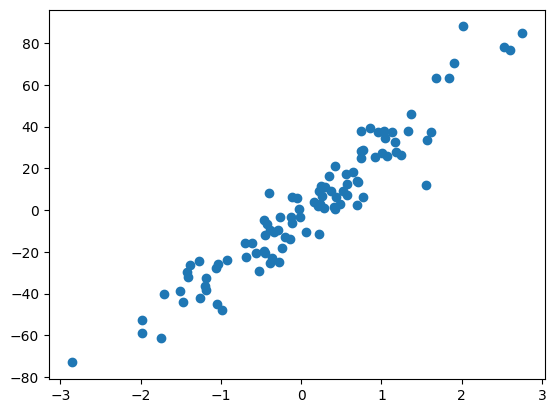

In [207]:
plt.scatter(X,y)

In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=33)

In [209]:
 from sklearn.linear_model import LinearRegression
 lr= LinearRegression()
 lr.fit(X_train,y_train)

LinearRegression()

In [210]:
m=lr.coef_
b=lr.intercept_
print("b= ",b)
print("m= ",m)

b=  -0.5339714591287699
m=  [29.19663762]


In [211]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)
print("r2_score= ",r2_score(y_test,y_pred))

r2_score=  0.9113905602518146


In [212]:
class GD:

  def __init__(self,learning_rate,epochs):
    self.m=10  # Initialize m
    self.b=110  # Initialize b
    self.learning_rate=learning_rate
    self.epochs=epochs

  def fit(self,X,y):

    for i in range(self.epochs):
      X=X.flatten() # to prevent broadcasting  refer -> why flatten use cell
      slope_b=-2*np.sum(y- (self.m*X)-self.b)
      slope_m=-2*np.sum((y- (self.m*X) -self.b)*X) # Corrected slope_m calculation
      step_size_b = self.learning_rate*slope_b
      step_size_m = self.learning_rate*slope_m

      self.m=self.m-step_size_m
      self.b=self.b-step_size_b

    print(self.m,self.b)

  def predict(self,X):
    X=X.flatten()
    return self.m*X+self.b

In [213]:
# why flatten use
a=np.array([[1],
            [2],
            [3]])
b=np.array([1,2,3])
print("shape a=",a.shape)
print("shape b=",b.shape)
print("2a-2=",2*a-2)
print("2b-2=",2*b-2)
print(" ")
print("2a=" , 2*a)
print("2b=" , 2*b)

shape a= (3, 1)
shape b= (3,)
2a-2= [[0]
 [2]
 [4]]
2b-2= [0 2 4]
 
2a= [[2]
 [4]
 [6]]
2b= [2 4 6]


In [214]:
sum_b=np.sum(b)
sum_a=np.sum(a)
print("sum_a=",sum_a)
print("sum_b=",sum_b)

sum_a= 6
sum_b= 6


In [215]:
# why flatten use
a = np.array([[1], [2], [3]])   # shape = (3, 1)
b = np.array([2, 4, 6])         # shape = (3,)

error = b - (2 * a + 1)
error1= b - (2 * a.flatten() + 1)       # this will broadcast strangely

print("Error shape:", error.shape)
print("Error shape 1 :", error1.shape)
error1

Error shape: (3, 3)
Error shape 1 : (3,)


array([-1, -1, -1])

In [216]:
X_train[0:5,:]

array([[ 0.64415927],
       [ 1.67955097],
       [-0.92686366],
       [ 0.76465008],
       [-0.11608402]])

In [217]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [218]:
X_train_std[0:5] -1

array([[-0.5512984 ],
       [ 0.41398826],
       [-2.0159494 ],
       [-0.43896587],
       [-1.2600666 ]])

In [219]:
gd_lr=GD(0.001,20)
gd_lr.fit(X_train_std,y_train)

30.664977745180277 7.457108485545043


In [220]:
y_pred_1=gd_lr.predict(X_test_std)
r2_score(y_test,y_pred_1)

0.8938717078833112

In [221]:
# without std
gd_lr=GD(0.001,20)
gd_lr.fit(X_train,y_train)
y_pred_2=gd_lr.predict(X_test)
r2_score(y_test,y_pred_2)

27.19465774603975 3.652511669309696


0.8811644171405069

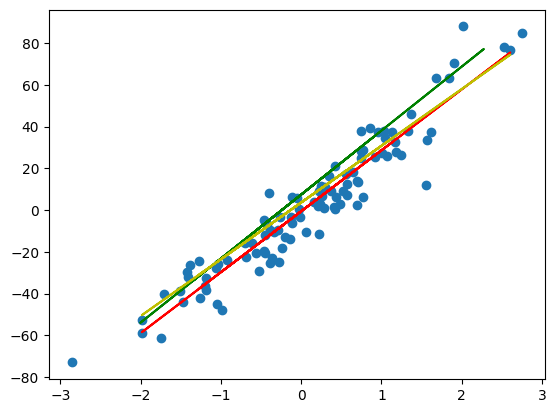

In [223]:
plt.scatter(X,y)
plt.plot(X_test,y_pred, color='r') # sklearn
plt.plot(X_test_std,y_pred_1, color='g')# with std
plt.plot(X_test,y_pred_2, color='y') # without std